# **ML Házi Feladat**
# (Király Márk - AX83OL)

## Feltelepítjük a szükséges lib-eket.

In [1]:
!pip install pandas scikit-learn

## **Megpróbálkozunk** a feladat megoldásával... (A működése ommentelve!!!)

In [36]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
import warnings

# Adatok betöltése
df = pd.read_csv('https://raw.githubusercontent.com/karsarobert/Machine_Learning_2024/main/BAF3A.csv', header=0) # A fejlécet [0.sor] eldobjuk...

# Hiányzó értékek kezelése: hiányzó sorok eldobása
df.dropna(inplace=True)

# Független változók (X) és célváltozó (y) kiválasztása
X = df.drop(['ClassName', 'ClassValue'], axis=1) # Eldobjuk a 'ClassName' és 'ClassValue' oszlopokat
y = df['ClassValue'] # A célváltozó...

# Tanító és teszt adatokra bontás
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# SVC létrehozása és paraméterek beállítása
svc = SVC(kernel='rbf')

parameters = {'C': (100, 1e3, 1e4, 1e5),
              'gamma': (1e-08, 1e-7, 1e-6, 1e-5)}

# Kikapcsoljuk a figyelmeztetéseket
warnings.filterwarnings("ignore", category=UserWarning)

# GridSearchCV létrehozása és illesztése az adatokra
grid_search = GridSearchCV(svc, parameters, n_jobs=-1, cv=5) #5-ször több az éles adat a tanulóadatnál
grid_search.fit(X_train, y_train) # A model illesztése

# Legjobb paraméterek és pontosság kiíratása
print(grid_search.best_params_)
print(grid_search.best_score_)

# Legjobb becslő kiválasztása és pontosságának kiíratása
svc_best = grid_search.best_estimator_
accuracy = svc_best.score(X_test, y_test)
print(f'The accuracy is: {accuracy*100:.1f}%')

# Minden egyéb (pl.: precision, recall, f1-score, support...) kiíratása
prediction = svc_best.predict(X_test)
report = classification_report(y_test, prediction)
print(report)

{'C': 10000.0, 'gamma': 1e-07}
0.8319018404907975
The accuracy is: 81.9%
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         0
           2       0.64      0.94      0.76        85
           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00        13
           6       0.92      0.96      0.94       262
           7       0.75      0.08      0.15        36
           8       0.00      0.00      0.00        10
           9       0.00      0.00      0.00         0

    accuracy                           0.82       408
   macro avg       0.26      0.22      0.21       408
weighted avg       0.79      0.82      0.77       408



# Figyelem! Hiba!
Mivel vannak olyan értékek, melyek a ClassValue célváltozó oszlopban csak 1-szer szerepelnek, így a tanító ClassValue oszlop különböző értékeinek száma nem fog megegyezni a teszt CalssValue különböző értékeinek számával.

In [37]:
import pandas as pd

# CSV fájl beolvasása
df = pd.read_csv('https://raw.githubusercontent.com/karsarobert/Machine_Learning_2024/main/BAF3A.csv')

unique_classes_train = y_train.unique()
unique_classes_test = y_test.unique()

print("A tanuló halmaz osztályainak száma:", set(unique_classes_train))
print("A teszt halmaz osztályainak száma:", set(unique_classes_test))

# Metszet és unió meghatározása
intersection = set(unique_classes_test).intersection(set(unique_classes_train))
union = set(unique_classes_test).union(set(unique_classes_train))

result_set_train = (union-intersection)-set(unique_classes_train)
result_set_test = (union-intersection)-set(unique_classes_test)

result_string_train = '; '.join(map(str, result_set_train))
result_string_test = '; '.join(map(str, result_set_test))

print("A következő elemek szerepelnek a teszt halmazban, de a tanuló halmazban viszont nem: ",result_string_train," (Ez ",len(result_set_train),"db osztályt jelent.)")
print("A következő elemek szerepelnek a tanuló halmazban, de a teszt halmazban viszont nem: ",result_string_test," (Ez ",len(result_set_test),"db osztályt jelent.")

A tanuló halmaz osztályainak száma: {1, 2, 4, 5, 6, 7, 8, 9, 10}
A teszt halmaz osztályainak száma: {2, 3, 4, 5, 6, 7, 8}
A következő elemek szerepelnek a teszt halmazban, de a tanuló halmazban viszont nem:  3  (Ez  1 db osztályt jelent.)
A következő elemek szerepelnek a tanuló halmazban, de a teszt halmazban viszont nem:  1; 10; 9  (Ez  3 db osztályt jelent.


# Az előbb említett hiba feloldása:

Az előbbi hibát úgy köszörüljük ki, hogy eldobjuk az előzőekben látott olyan sorokat (osztályok) a ClassValue oszlopból, melyek csak egyszer fordulnak elő.


```
classes_to_remove = result_set_train.union(result_set_test)
df = df[~df['ClassValue'].isin(classes_to_remove)]
```

Így nem lesz olyan, hogy egy adat csak a teszt vagy csak a tanuló halmazban szerepel. A modell pontossága is várhatóan javulni fog ezáltal.

In [39]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
import warnings

# Adatok betöltése
df = pd.read_csv('https://raw.githubusercontent.com/karsarobert/Machine_Learning_2024/main/BAF3A.csv', header=0) # A fejlécet [0.sor] eldobjuk...

# Hiányzó értékek kezelése: hiányzó sorok eldobása
df.dropna(inplace=True)

# MÓDOSÍTÁS!!!! ---------
classes_to_remove = result_set_train.union(result_set_test)
df = df[~df['ClassValue'].isin(classes_to_remove)]
# -----------------------

# Független változók (X) és célváltozó (y) kiválasztása
X = df.drop(['ClassName', 'ClassValue'], axis=1) # Eldobjuk a 'ClassName' és 'ClassValue' oszlopokat
y = df['ClassValue'] # A célváltozó...

# Tanító és teszt adatokra bontás
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# SVC létrehozása és paraméterek beállítása
svc = SVC(kernel='rbf')

parameters = {'C': (100, 1e3, 1e4, 1e5),
              'gamma': (1e-08, 1e-7, 1e-6, 1e-5)}

# Kikapcsoljuk a figyelmeztetéseket
warnings.filterwarnings("ignore", category=UserWarning)

# GridSearchCV létrehozása és illesztése az adatokra
grid_search = GridSearchCV(svc, parameters, n_jobs=-1, cv=5) #5-ször több az éles adat a tanulóadatnál
grid_search.fit(X_train, y_train) # A model illesztése

# Legjobb paraméterek és pontosság kiíratása
print(grid_search.best_params_)
print(grid_search.best_score_)

# Legjobb becslő kiválasztása és pontosságának kiíratása
svc_best = grid_search.best_estimator_
accuracy = svc_best.score(X_test, y_test)
print(f'The accuracy is: {accuracy*100:.1f}%')

# Minden egyéb (pl.: precision, recall, f1-score, support...) kiíratása
prediction = svc_best.predict(X_test)
report = classification_report(y_test, prediction)
print(report)

{'C': 100, 'gamma': 1e-06}
0.8257378917378919
The accuracy is: 85.7%
              precision    recall  f1-score   support

           2       0.72      0.99      0.83        88
           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00        13
           6       0.92      0.98      0.95       265
           7       1.00      0.11      0.20        27
           8       0.00      0.00      0.00        13

    accuracy                           0.86       407
   macro avg       0.44      0.35      0.33       407
weighted avg       0.82      0.86      0.81       407



## Az egyes jellemzők fontosságát (hogy milyen mértékben befolyásolják a pontosságot) az alábbi grafikon mutatja be:

Megjegyzés:
Újra lefuttatva ezt a céllát, újabb értéket kapnánk.
Ezekből akár átlagot is lehetne számolni.

## Megtesszük!!!
10-szer lefuttatjuk a folyamatot, majd a végén vesszük a 10 futás átlageredményét. Természetesen ezt érdemes lenne nagyságrendekkel többször megcsinálni... csak arra most nincs időm...

Text(0.5, 0, 'Permutation Importance')

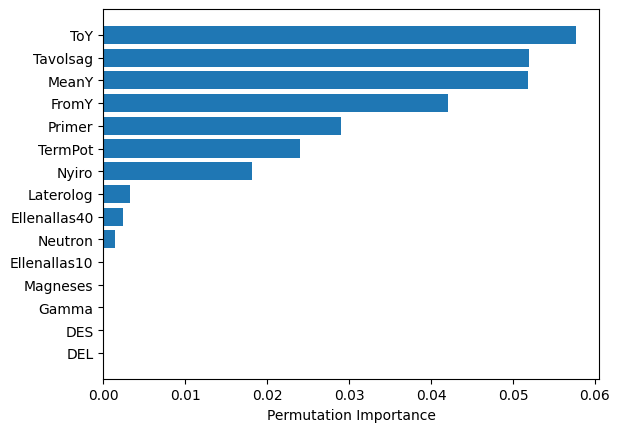

In [46]:
from sklearn.inspection import permutation_importance
import numpy as np
import matplotlib.pyplot as plt

perm_importance_list = []

# 10-szer meghívjuk a permutation_importance függvényt
for _ in range(10):
    perm_importance = permutation_importance(svc_best, X_test, y_test)
    perm_importance_list.append(perm_importance)

importances_means = [perm_importance.importances_mean for perm_importance in perm_importance_list]

# Vesszük a 10 menetnek az átlagát
average_importance = np.mean(importances_means, axis=0)

feature_names = X.columns.to_list()
features = np.array(feature_names)

sorted_idx = average_importance.argsort()
plt.barh(features[sorted_idx], average_importance[sorted_idx])
plt.xlabel("Permutation Importance")